<a href="https://colab.research.google.com/github/JGrant3101/ME4MachineLearning/blob/main/Tutorial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Start by importing libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn import model_selection
from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB
# Setting the random seed to 5 as defined in the tutorial sheet
np.random.seed(5)

Here we have imported all the required libaries set the random seed to the value specified in the sheet.

Question 1

In [3]:
# Defining a function that is the Gaussian function
def GaussFunc(x, mean, std):
  Gauss = (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-(((x - mean) / std) ** 2)/2)
  return Gauss


Here we have created the Gaussian function

p(x|w1) represents the probability distribution of x given the state of nature w1

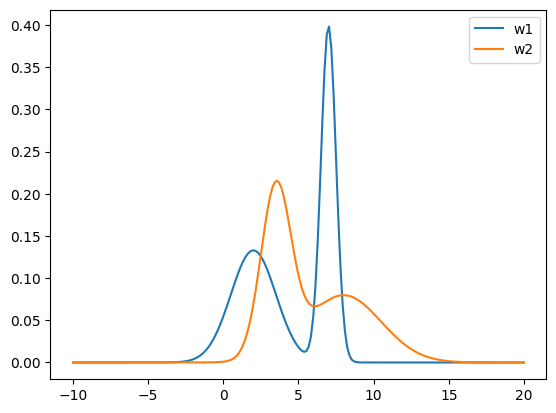

In [4]:
# Creating the two probability distributions for p(x|w1) and p(x|w2)
# Creating the x array
x = np.linspace(-10, 20, 200)

# Creating the Gaussian distributions
Gaussw1A = GaussFunc(x, 2, 1.5)
Gaussw1B = GaussFunc(x, 7, 0.5)
Gaussw2A = GaussFunc(x, 8, 2.5)
Gaussw2B = GaussFunc(x, 3.5, 1)

# Making the two probability distributions by summing these
PDFw1 = Gaussw1A + Gaussw1B
PDFw2 = Gaussw2A + Gaussw2B

# Scaling both distributions so that they integrate to 1
PDFw1 /= np.trapz(PDFw1,x)
PDFw2 /= np.trapz(PDFw2,x)

# Plotting
fig1, ax1 = plt.subplots()
plt.plot(x, PDFw1, label = "w1")
plt.plot(x, PDFw2, label = "w2")
plt.legend()

Above we have created and plotted the probability distributions of p(x|w1) and p(x|w2)

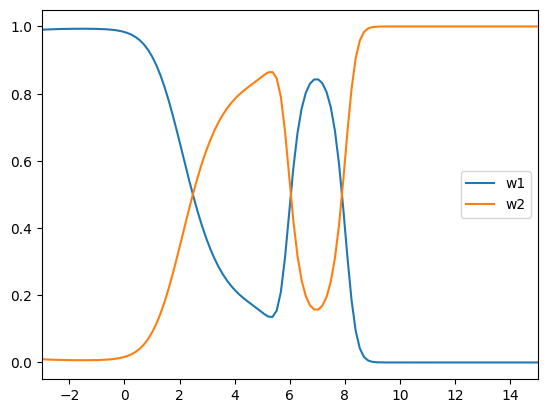

In [6]:
# Been told the priors, P(w1) = P(w2) = 0.5, and have been told to calculate the posterior distributions
# and plot them
# Going to do this by defining a function to get the posterior and call it for both the pre defined
# probability distributions. As x is uniformly distributed can ignore the p(x) term in the calcultion
# of the posterior
def GetPost(Distrib, Prior, evidence):
  Post = (Distrib * Prior) / evidence
  return Post

# Creating the evidence array, evidence being p(x)
evidence = 0.5 * PDFw1 + 0.5 * PDFw2

# Calling the function for each distribution
Postw1 = GetPost(PDFw1, 0.5, evidence)
Postw2 = GetPost(PDFw2, 0.5, evidence)

# Plotting
fig1, ax1 = plt.subplots()
plt.plot(x, Postw1, label = "w1")
plt.plot(x, Postw2, label = "w2")
plt.xlim([-3, 15])
plt.legend()


Here our posterior plots look idenctical to our likelihood plots, this makes sense as the prior for both states of nature is equal and the evidence is a constant so has no effects on the shapes of the graphs relative to each other. Will now try with the varying priors as mentioned in the tutorial sheet, I'm predicting that with the values they've given me the w1 posterior will look a lot larger than the w2 one

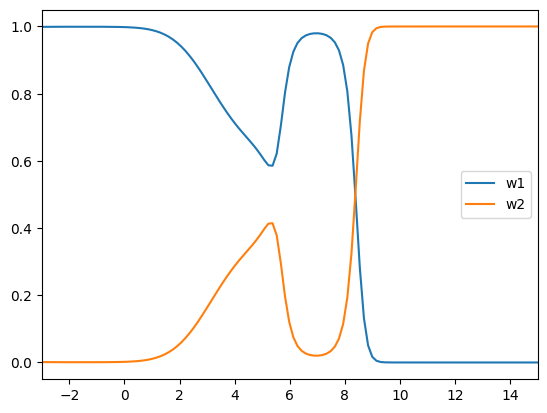

In [7]:
# Repeating the posterior plots put with different prior values as specified in the sheet
# Creating the evidence array, evidence being p(x)
evidence = 0.9 * PDFw1 + 0.1 * PDFw2

# Calling the function for each distribution
Postw1New = GetPost(PDFw1, 0.9, evidence)
Postw2New = GetPost(PDFw2, 0.1, evidence)

# Plotting
fig1, ax1 = plt.subplots()
plt.plot(x, Postw1New, label = "w1")
plt.plot(x, Postw2New, label = "w2")
plt.xlim([-3, 15])
plt.legend()

I was right

Question 2

(-3.0, 3.0)

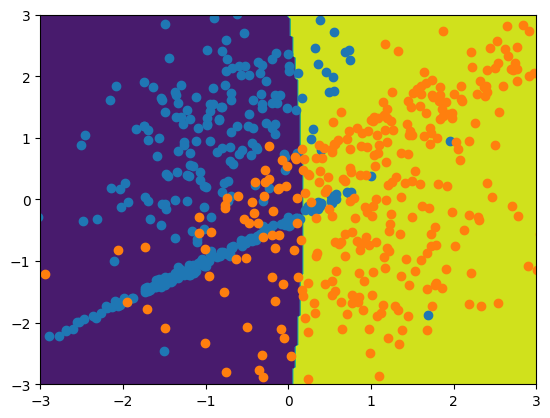

In [25]:
# Start by creating a dataset
X, y = sklearn.datasets.make_classification(n_samples = 1000, n_features = 2, n_informative = 2, n_redundant = 0)

# Splitting the data into a test and training set
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.33)

# Fitting the model
clf = GaussianNB()
clf.fit(X_train, y_train)

# Generating the mesh grid from -3 to 3 with 200 points in x and y
x1line = np.linspace(-3, 3, 200)
x2line = np.linspace(-3, 3, 200)
x1grid, x2grid = np.meshgrid(x1line, x2line)
Xgrid = np.array([x1grid, x2grid]).reshape([2, 200*200]).T

# Predicting values
classVals = clf.predict(Xgrid)
classVals = np.reshape(classVals, [200, 200])

# plotting
fig, ax = plt.subplots()
plt.contourf(x1line, x2line, classVals)
ax.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1])
ax.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1])
plt.xlim(-3, 3)
plt.ylim(-3, 3)

Above we have generated a dataset, split it into a test and train portions. Then we generated data for a new set of points which generated the contour plot showing what the model predicted. Finally we plotted out test points on the contour, they show that in general the model was moslty accurate.

In [26]:
# predicting the test data values
y_test_model = clf.predict(X_test)

# Comparing to the actual test y values
nTot = len(y_test)
nMatch = 0
for i in range (nTot):
  if y_test[i] == y_test_model[i]:
    nMatch += 1

# Printing the percentage of correct results
print(100 * (nMatch/nTot))

84.54545454545455


Above we have predicted what the test value would be based on our model fit and compared that to the actual test values to see the percentage of inputs we got correct.

(-3.0, 3.0)

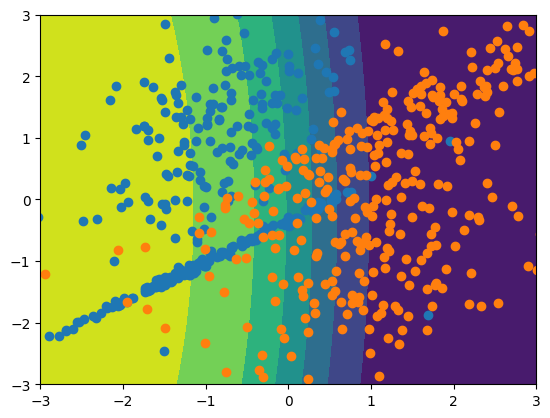

In [27]:
probVals = clf.predict_proba(Xgrid)
probGrid = np.reshape(probVals[:, 0], [200, 200])

fig, ax = plt.subplots()
plt.contourf(x1line,x2line,probGrid)

ax.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1])
ax.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1])
plt.xlim(-3, 3)
plt.ylim(-3, 3)